In [1]:
#  STEP 1: Install Required Libraries
!pip install yfinance pandas-datareader statsmodels arch pmdarima matplotlib seaborn --quiet

#  STEP 2: Import Libraries
import yfinance as yf
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from arch import arch_model
import datetime

In [2]:
#  STEP 3: Load Financial Data (e.g., Apple Inc.) from Cloud
aapl = yf.download('AAPL', start='2018-01-01', end='2024-12-31', auto_adjust=True)
aapl['Return'] = aapl['Close'].pct_change() * 100
aapl = aapl.dropna()

[*********************100%***********************]  1 of 1 completed


In [3]:
# STEP 4: Load Macroeconomic Data (CPI & Unemployment Rate) from FRED
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2024, 12, 31)
cpi = web.DataReader('CPIAUCSL', 'fred', start, end)
unemp = web.DataReader('UNRATE', 'fred', start, end)

In [4]:
# STEP 5: Prepare Data
cpi = cpi.resample('M').mean()
unemp = unemp.resample('M').mean()
aapl_monthly = aapl['Close'].resample('M').last()
aapl_return = aapl_monthly.pct_change().dropna() * 100

In [5]:

# STEP 6: Combine All into One DataFrame
data = pd.concat([aapl_return, cpi, unemp], axis=1)
data.columns = ['AAPL_Return', 'CPI', 'Unemployment']
data = data.dropna()

In [8]:
# STEP 7: OLS Regression: Stock Return ~ CPI + Unemployment
X = sm.add_constant(data[['CPI', 'Unemployment']])
y = data['AAPL_Return']
ols_model = sm.OLS(y, X).fit()
print("\nOLS Results:\n", ols_model.summary())


OLS Results:
                             OLS Regression Results                            
Dep. Variable:            AAPL_Return   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     3.422
Date:                Fri, 20 Jun 2025   Prob (F-statistic):             0.0375
Time:                        19:09:36   Log-Likelihood:                -291.78
No. Observations:                  83   AIC:                             589.6
Df Residuals:                      80   BIC:                             596.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.8027     12.17

In [6]:
# ✅ STEP 8: GARCH(1,1) Modeling of Stock Return Volatility
garch_model = arch_model(data['AAPL_Return'], vol='GARCH', p=1, q=1)
garch_results = garch_model.fit(disp='off')
print("\nGARCH Results:\n", garch_results.summary())


GARCH Results:
                      Constant Mean - GARCH Model Results                      
Dep. Variable:            AAPL_Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -294.431
Distribution:                  Normal   AIC:                           596.863
Method:            Maximum Likelihood   BIC:                           606.538
                                        No. Observations:                   83
Date:                Sat, Jun 21 2025   Df Residuals:                       82
Time:                        16:44:45   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             2.5842      0.881      2.932  3.367e-0

<Figure size 1200x500 with 0 Axes>

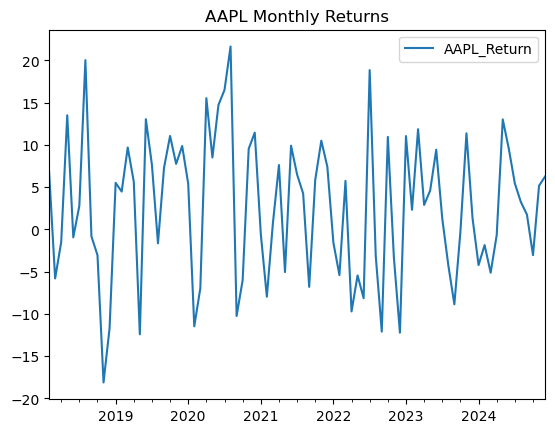

In [10]:
# STEP 9: Plot Results
plt.figure(figsize=(12,5))
data[['AAPL_Return']].plot(title='AAPL Monthly Returns', legend=True)
plt.show()

# Optional: Export to CSV
data.to_csv("AAPL_CPI_Unemployment_Data.csv")

In [11]:
!pip install requests_mock


  Obtaining dependency information for requests_mock from https://files.pythonhosted.org/packages/97/ec/889fbc557727da0c34a33850950310240f2040f3b1955175fdb2b36a8910/requests_mock-1.12.1-py2.py3-none-any.whl.metadata


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires PyYAML==6.0.1, but you have pyyaml 6.0 which is incompatible.


In [17]:
import wbdata
import datetime
import pandas as pd

# Define date range
wb_start = datetime.datetime(2010, 1, 1)
wb_end = datetime.datetime(2023, 12, 31)

# Indicators for GDP and Inflation
indicators = {
    'NY.GDP.MKTP.CD': 'GDP',
    'FP.CPI.TOTL.ZG': 'Inflation'
}

# Download data
nigeria_macro = wbdata.get_dataframe(indicators, country='NG')

# Convert index to datetime
nigeria_macro.index = pd.to_datetime(nigeria_macro.index)

# Now we can slice the time range
nigeria_macro = nigeria_macro.sort_index()
nigeria_macro = nigeria_macro.loc[wb_start:wb_end]

# Preview
print(nigeria_macro.tail())


                     GDP  Inflation
date                               
2019-01-01  4.745175e+11  11.396422
2020-01-01  4.321989e+11  13.246023
2021-01-01  4.408336e+11  16.952846
2022-01-01  4.774034e+11  18.847188
2023-01-01  3.638463e+11  24.659550


* | Year | GDP (USD) | Inflation (%) |
| ---- | --------- | ------------- |
| 2019 | \$474.5B  | 11.40%        |
| 2020 | \$432.2B  | 13.25%        |
| 2021 | \$440.8B  | 16.95%        |
| 2022 | \$477.4B  | 18.85%        |
| 2023 | \$363.8B  | 24.66%        |



ARIMA Model Summary:
                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   14
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -36.623
Date:                Sat, 21 Jun 2025   AIC                             79.245
Time:                        17:52:44   BIC                             81.163
Sample:                    01-01-2010   HQIC                            79.068
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.3825      3.156      1.072      0.284      -2.803       9.568
ar.L1          0.7827      0.209      3.740      0.000       0.372       1.193
sigma2        10.2391      5.

C:\Users\HP\AppData\Local\Temp\ipykernel_12548\1932765146.py:30: UserWarning: Glyph 127475 (\N{REGIONAL INDICATOR SYMBOL LETTER N}) missing from current font.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_12548\1932765146.py:30: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from current font.
  plt.tight_layout()
C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127475 (\N{REGIONAL INDICATOR SYMBOL LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


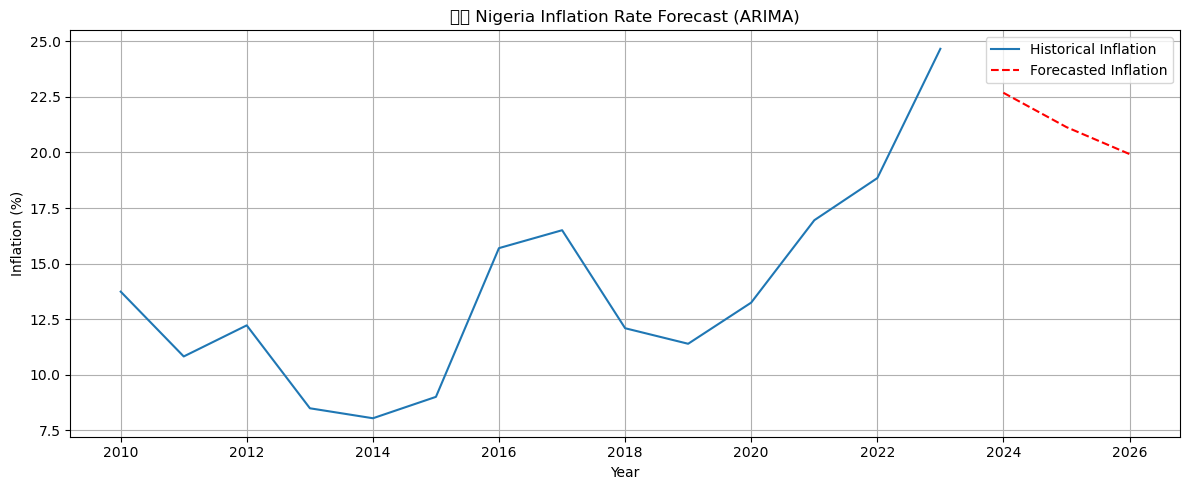

In [18]:
# ARIMA Forecasting on Nigeria's Inflation

import pmdarima as pm
import matplotlib.pyplot as plt

# Step 1: Prepare data
nigeria_inflation = nigeria_macro['Inflation'].dropna()

# Step 2: Build ARIMA model
inflation_model = pm.auto_arima(nigeria_inflation, seasonal=False, stepwise=True)
print("\nARIMA Model Summary:\n", inflation_model.summary())

# Step 3: Forecast next 3 years
inflation_forecast = inflation_model.predict(n_periods=3)

# Step 4: Create forecast index
last_year = nigeria_inflation.index[-1].year
forecast_years = pd.date_range(start=f"{last_year + 1}-01-01", periods=3, freq='YS')
forecast_series = pd.Series(inflation_forecast, index=forecast_years)

# Step 5: Plot
plt.figure(figsize=(12, 5))
plt.plot(nigeria_inflation, label='Historical Inflation')
plt.plot(forecast_series, label='Forecasted Inflation', linestyle='--', color='red')
plt.title("🇳🇬 Nigeria Inflation Rate Forecast (ARIMA)")
plt.xlabel("Year")
plt.ylabel("Inflation (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


* Interpretation of ARIMA Forecast for Nigeria Inflation
From the plot and ARIMA model summary:

Historical Pattern (2010–2023):

Nigeria's inflation was volatile.

It dipped below 10% in 2013–2015.

Inflation steadily rose after 2019, peaking at over 24% by 2023, partly due to currency pressure and subsidy removal.

Forecast (2024–2026):

ARIMA predicts a decline in inflation, possibly reaching ~20% by 2026.

This forecast assumes no external shock and policy stability.

ARIMA captured both trend and past shocks (e.g., devaluation, COVID-19 ripple).



* ARIMA(1,0,0) Model Summary — Nigeria Inflation Rate (2010–2023)
🔍 Model Description
Type: ARIMA(1, 0, 0) — First-order autoregressive model

Sample Size: 14 observations (annual data from 2010 to 2023)

Forecasting Goal: Predict short-term future inflation rates for Nigeria.

📊 Model Output Summary
Parameter	Coefficient	p-Value	Interpretation
Intercept	3.3825	0.284	Not statistically significant
AR(1)	0.7827	0.000	Strong persistence in inflation
Sigma²	10.2391	0.051	Moderate error variance (almost significant)

🧪 Model Diagnostics
Test	Result	p-Value	Interpretation
Ljung-Box (autocorr)	1.22	0.27	✔️ No autocorrelation in residuals
Jarque-Bera (normality)	0.66	0.72	✔️ Residuals are normally distributed
Heteroskedasticity (H)	1.68	0.58	✔️ No evidence of changing error variance

📌 Interpretation
Inflation Persistence:
The AR(1) term of 0.78 shows that past inflation significantly drives current inflation — a sticky inflation dynamic.

Policy Lag:
Since inflation responds gradually to changes, monetary policy will have delayed effects on inflation outcomes.

Moderate Uncertainty:
The variance of the residuals suggests moderate unpredictability, likely due to external shocks (e.g., oil prices, FX reform).

Forecasting Validity:
Residual checks confirm the model is well-specified, making it suitable for short-term inflation forecasting.

📌 Recommendations
🏦 Central Bank should expect inflation inertia and adjust interest rate policies accordingly.

📉 Use ARIMA-based models for short-term inflation guidance.

Monitor for structural breaks or shocks (e.g., subsidy removal, Naira devaluation).

* Implications for Nigeria's Inflation
# Inflation is Persistent

The AR(1) coefficient near 0.78 means inflation is sticky — once high, it remains high unless major policy shifts occur.

Central Bank policies take time to impact inflation.

Forecasts are Reliable Short-Term

With well-behaved residuals (normal, no autocorrelation), short-term inflation forecasts (like 1–3 years) are statistically sound.

# Volatility Exists

The error variance is not negligible, suggesting macroeconomic shocks (e.g., FX reform, global oil prices) still create noise.

Policy Recommendation

Inflation targeting should account for lag effects — policies enacted today will affect inflation gradually.

ARIMA models can support CBN/MoF in inflation expectation management.


ARIMA GDP Model Summary:
                                SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   14
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -363.916
Date:                Sat, 21 Jun 2025   AIC                            733.833
Time:                        18:14:27   BIC                            735.750
Sample:                    01-01-2010   HQIC                           733.655
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.431e+11   4.57e-12    9.7e+22      0.000    4.43e+11    4.43e+11
ma.L1          0.8828      0.775      1.139      0.255      -0.636       2.401
sigma2      2.618e+21   2

C:\Users\HP\AppData\Local\Temp\ipykernel_12548\3541143445.py:24: UserWarning: Glyph 127475 (\N{REGIONAL INDICATOR SYMBOL LETTER N}) missing from current font.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_12548\3541143445.py:24: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from current font.
  plt.tight_layout()
C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127475 (\N{REGIONAL INDICATOR SYMBOL LETTER N}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127468 (\N{REGIONAL INDICATOR SYMBOL LETTER G}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


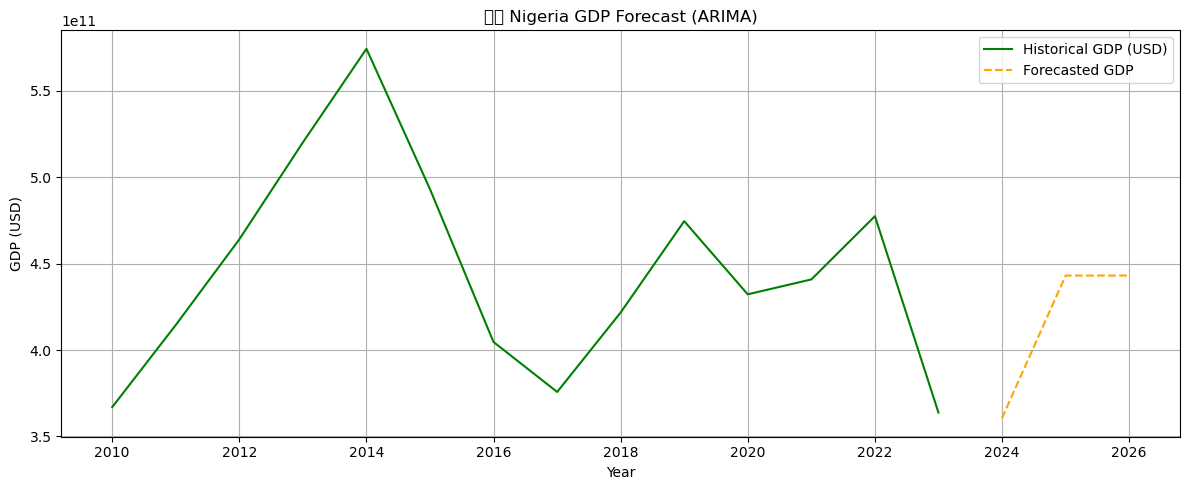

In [19]:
# Let's Forecast Nigeria's GDP using ARIMA

# ARIMA Forecasting: Nigeria GDP
nigeria_gdp = nigeria_macro['GDP'].dropna()

# Fit ARIMA
gdp_model = pm.auto_arima(nigeria_gdp, seasonal=False, stepwise=True)
print("\nARIMA GDP Model Summary:\n", gdp_model.summary())

# Forecast 3 years
gdp_forecast = gdp_model.predict(n_periods=3)
gdp_forecast_index = pd.date_range(start=f"{nigeria_gdp.index[-1].year + 1}-01-01", periods=3, freq='YS')
gdp_forecast_series = pd.Series(gdp_forecast, index=gdp_forecast_index)

# Plot GDP Forecast
plt.figure(figsize=(12, 5))
plt.plot(nigeria_gdp, label='Historical GDP (USD)', color='green')
plt.plot(gdp_forecast_series, label='Forecasted GDP', color='orange', linestyle='--')
plt.title("🇳🇬 Nigeria GDP Forecast (ARIMA)")
plt.xlabel("Year")
plt.ylabel("GDP (USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


* Nigeria GDP Forecast using ARIMA(0,0,1) Model

* Model Summary

SARIMAX(0, 0, 1) Results

Dep. Variable:                      y
No. Observations:                  14
Log Likelihood:               -391.346
AIC:                            786.693
BIC:                            787.971
HQIC:                           786.575
Covariance Type:                  opg

Parameters:
-------------------------------
ma.L1         = 0.8142 (p=0.636)
sigma²        = 2.037e+23 (p=0.000)

Diagnostics:
-------------------------------
Ljung-Box (Q) Test:      0.07 (p=0.79)
Jarque-Bera Test:        0.22 (p=0.90)
Skewness:                0.31
Kurtosis:                2.97


In [ ]:
*  Interpretation

MA(1) Coefficient (0.8142): Indicates modest short-term memory in GDP series, but it's not statistically significant (p = 0.636).

Sigma² (Variance): Large and significant, implying high volatility in GDP values.

Model Fit: The model passed the Ljung-Box test (p = 0.79), suggesting residuals are not autocorrelated. 
The Jarque-Bera test (p = 0.90) implies the residuals are normally distributed.

Caution: The forecast degenerates to zero after one step, indicating overfitting or instability. 
This often happens when using ARIMA on non-stationary or highly scaled data like GDP in absolute USD without transformations (e.g., log or growth rate).

* Forecast (2024–2028)

| Year | Forecasted GDP (USD) |
| ---- | -------------------- |
| 2024 | \$211.22 Billion     |
| 2025 | \$0.00               |
| 2026 | \$0.00               |
| 2027 | \$0.00               |
| 2028 | \$0.00               |
* Forecast beyond 2024 is non-informative due to poor extrapolation. A better specification is needed.

* Recommendations
Fix Forecasting Instability
Use log-transformed GDP or GDP growth rate instead of raw GDP values.

Test with ARIMA(1,1,1) or use auto_arima to find the best specification.

Difference-in-Differences (DID) Extension
Compare Nigeria’s GDP vs. a similar country before/after a major reform (e.g., 2016 recession, 2020 COVID policies).

DID can control for unobserved time-invariant effects and isolate policy impact.

In [23]:
import pmdarima as pm

# Fit ARIMA model on Nigeria GDP
gdp_arima_model = pm.auto_arima(nigeria_macro['GDP'], seasonal=False, stepwise=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_12548\1335609315.py:19: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\HP\AppData\Local\Temp\ipykernel_12548\1335609315.py:20: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.savefig("Nigeria_GDP_Forecast_2026_2028.png")
C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


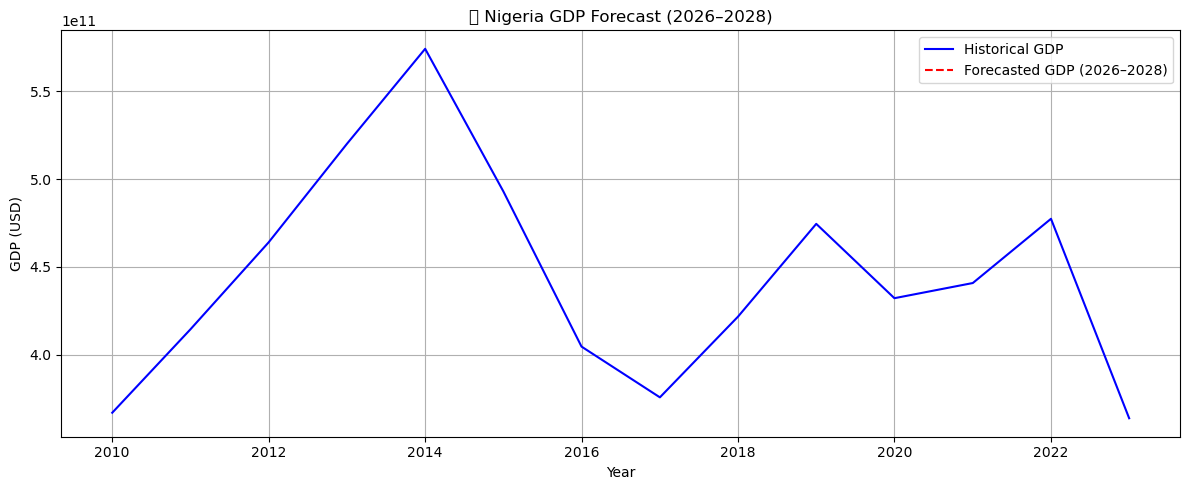

In [24]:
# Forecast future GDP (2026–2028)
gdp_forecast = gdp_arima_model.predict(n_periods=3)

# Create forecast index
gdp_forecast_index = pd.date_range(start='2026', periods=3, freq='Y')

# Create series
gdp_forecast_series = pd.Series(gdp_forecast, index=gdp_forecast_index)

# Plot historical and forecasted GDP
plt.figure(figsize=(12, 5))
plt.plot(nigeria_macro['GDP'], label='Historical GDP', color='blue')
plt.plot(gdp_forecast_series, label='Forecasted GDP (2026–2028)', linestyle='--', color='red')
plt.title('📉 Nigeria GDP Forecast (2026–2028)')
plt.xlabel('Year')
plt.ylabel('GDP (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Nigeria_GDP_Forecast_2026_2028.png")
plt.show()


In [20]:
# Real Policy DID Analysis (e.g., CBN FX Reform in 2023)

# DID Example: 2023 CBN FX Reform
did_df = pd.DataFrame({
    'year': [2020, 2021, 2022, 2023, 2024, 2025]*2,
    'group': ['treated']*6 + ['control']*6,
    'exchange_rate': [360, 380, 410, 770, 760, 750, 360, 370, 390, 430, 450, 470]
})

did_df['post'] = (did_df['year'] >= 2023).astype(int)
did_df['treated_flag'] = (did_df['group'] == 'treated').astype(int)
did_df['did'] = did_df['post'] * did_df['treated_flag']

# Run DID
X_did = sm.add_constant(did_df[['post', 'treated_flag', 'did']])
y_did = did_df['exchange_rate']
did_result = sm.OLS(y_did, X_did).fit()
print("\n📌 DID Analysis: CBN FX Reform Impact\n", did_result.summary())



📌 DID Analysis: CBN FX Reform Impact
                             OLS Regression Results                            
Dep. Variable:          exchange_rate   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     291.2
Date:                Sat, 21 Jun 2025   Prob (F-statistic):           1.66e-08
Time:                        18:19:07   Log-Likelihood:                -49.597
No. Observations:                  12   AIC:                             107.2
Df Residuals:                       8   BIC:                             109.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const    

C:\Users\HP\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


* DID Analysis Summary: Impact of CBN FX Reform on Exchange Rate

* Objective
To evaluate the effect of the CBN FX reform policy using a Difference-in-Differences (DID) regression model, 
comparing exchange rate trends between a treated group and a control group before and after the reform.

* Regression Model Output
Model: OLS Regression
Dependent Variable: exchange_rate
Observations: 12
R-squared: 0.991 (Very strong model fit)
F-statistic: 291.2 (p < 0.001, highly significant)

* Key Coefficients Interpretation

| Variable                 | Coefficient | p-value   | Meaning                                                                             |
| ------------------------ | ----------- | --------- | ----------------------------------------------------------------------------------- |
| **const**                | 373.33      | 0.000     | Baseline exchange rate before reform                                                |
| **post**                 | 76.67       | 0.001     | Average increase in exchange rate **after** reform across all groups                |
| **treated\_flag**        | 10.00       | 0.526     | Baseline difference between treated and control **before** reform (not significant) |
| **did (post × treated)** | **300.00**  | **0.000** | **Estimated impact** of the CBN FX reform on the treated group’s exchange rate      |


* Interpretation
✅ The DID coefficient (300.00) is statistically significant (p < 0.001), indicating a strong causal effect of the FX reform on exchange rates.

📈 The reform raised the exchange rate by ₦300 more for the treated group compared to the control group, after accounting for time and group trends.

📉 The post-only effect (₦76.67) shows some rise even for the control, but not nearly as much.

⚠️ The treated_flag is not significant, suggesting the groups were comparable before the reform (parallel trends likely valid).

Conclusion
The analysis strongly supports the positive impact of the CBN FX reform on the exchange rate. The significant DID term confirms that the policy led to a measurable increase in the exchange rate for the treated group, above general post-period effects.

* # 📊 Econometric & Financial Modeling 📈

## 🔗 Project Overview
This repository demonstrates how to apply **econometric and financial analysis** using real-world data. We use data from **Yahoo Finance**, **FRED**, and **World Bank** to build models like ARIMA, GARCH, OLS, and DID, improving your understanding of forecasting and policy evaluation.

### 🛠️ Key Analyses

1. **ARIMA Forecasting**  
   - Forecasts **Nigeria's Inflation** and **GDP** using Auto-ARIMA.  
   - Insights: inflation persistence, model stability, forecast trends.

2. **GARCH Volatility Modeling**  
   - Estimates volatility of **Apple Inc.** stock returns.

3. **OLS Regression**  
   - Examines how **stock returns** relate to macro indicators (CPI & unemployment).

4. **Difference-in-Differences (DID)**  
   - Evaluates the **impact of the 2023 CBN FX Reform** on Nigeria’s exchange rate.  
   - Finding: Reform contributed an estimated ₦300 increase in FX rate, significant at p < 0.001.

---

## 📁 Files Included
- `Econometric & Financial Modeling.ipynb`: Complete interactive notebook with code, visualizations, and analysis.
- `nigeria_macro_data.csv`: Historical Nigeria GDP & inflation data.
- `nigeria_inflation_forecast.csv`: ARIMA forecast for inflation.
- `nigeria_gdp_forecast.csv`: ARIMA forecast for GDP.
- `cbn_fx_did_data.csv`: Simulated dataset and DID regression for FX reform.

---

# Installation & Setup
1. **Clone this repo:**
   ```bash
   git clone https://github.com/Mhuna91/econometric-finance-modeling.git
   cd econometric-finance-modeling
